# Predicting Concrete Strength using Linear Regression

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [70]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (6,4)

In [41]:
def scale_data(X, method='MinMax'):
    """
    This function will scale the data using Minmax function from Sklearn
    """
    if method == 'MinMax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    X_t = scaler.fit_transform(X)
    X_t=pd.DataFrame(X_t,columns=[X.columns])
    return X_t

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        max_vif_val = max(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('Dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' with VIF value : ' + str(max_vif_val))
            del variables[maxloc]
            dropped = True

    print('Final variables list:')
    print(X.columns[variables])
    return None

In [4]:
# read dataset
data = pd.read_csv('concrete.csv')

In [5]:
data.shape

(1030, 9)

In [6]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

zero null values :)

<AxesSubplot:xlabel='variable', ylabel='value'>

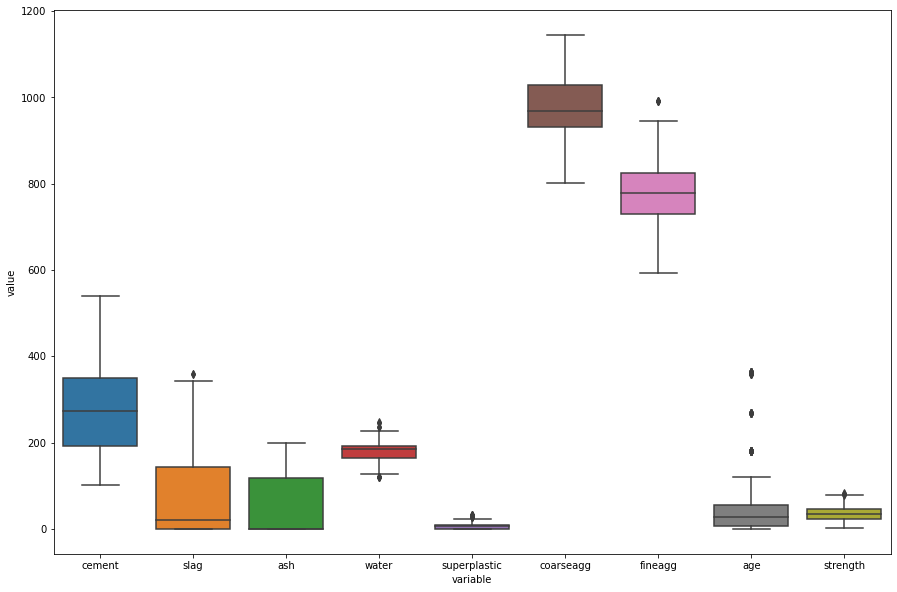

In [63]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(data))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [79]:
data.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  cement_age  avg_aggregate  
0     29.89          28         860.15  
1     23.51          14         938.50  
2     29.22          28         909.05  
3     45.85          28         801.00  
4     18.29          28         872.05  
5     21.86          90         917.40  
6     15.75           7         834.10  
7     36.64          56         893.05  
8     21.65          28         925.00  
9     28.99          28         789.50

In [10]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [11]:
X = data[data.columns.difference(['strength'])]
Y = data['strength']

In [40]:
calculate_vif(X)

Dropping 'coarseagg' with VIF value : 84.9557786410409
Dropping 'water' with VIF value : 72.09277209467753
Dropping 'fineagg' with VIF value : 14.219267942450411
Final variables list:
Index(['age', 'ash', 'cement', 'slag', 'superplastic'], dtype='object')


In [64]:
X_train = X[['age', 'ash', 'cement', 'slag', 'superplastic']]

### Base Model

In [65]:
pred = sm.add_constant(X_train)
model = sm.OLS(Y, pred)

In [66]:
results = model.fit()
results.params

const          -11.132139
age              0.101162
ash              0.059610
cement           0.102109
slag             0.075402
superplastic     0.776648
dtype: float64

In [67]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     275.8
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          8.49e-187
Time:                        18:57:26   Log-Likelihood:                -3922.0
No. Observations:                1030   AIC:                             7856.
Df Residuals:                    1024   BIC:                             7886.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.1321      1.706     -6.526   

### Feature engineering

In [72]:
data['cement_age'] = np.where(data['age']>100, 100 , data['age'])

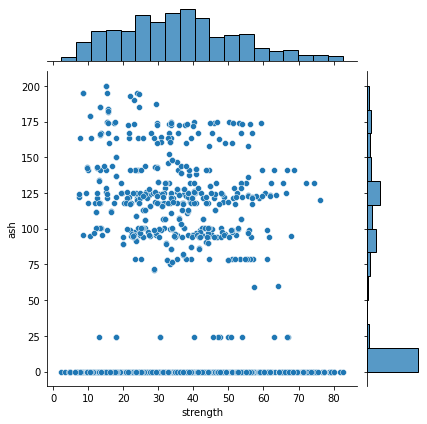

In [78]:
sns.jointplot(data['strength'], data['ash'])

In [75]:
data['avg_aggregate'] = data[['coarseagg','fineagg']].mean(axis=1)

### Model 2

In [82]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'cement_age', 'avg_aggregate'],
      dtype='object')

In [85]:
X = data[['cement', 'slag', 'ash', 'water', 'superplastic','cement_age', 'avg_aggregate']]
Y = data['strength']

In [86]:
calculate_vif(X)

Dropping 'water' with VIF value : 78.6150253185572
Dropping 'avg_aggregate' with VIF value : 17.89778306510882
Final variables list:
Index(['cement', 'slag', 'ash', 'superplastic', 'cement_age'], dtype='object')


In [91]:
X_train = X[['cement', 'slag', 'ash', 'superplastic', 'cement_age']]
pred = sm.add_constant(X_train)
model = sm.OLS(Y, pred)
results = model.fit()
results.params

const          -17.067876
cement           0.105105
slag             0.078204
ash              0.058676
superplastic     0.682771
cement_age       0.279136
dtype: float64

In [92]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     510.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          3.23e-275
Time:                        19:18:20   Log-Likelihood:                -3716.9
No. Observations:                1030   AIC:                             7446.
Df Residuals:                    1024   BIC:                             7475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.0679      1.423    -11.996   

#### Just a simple change in the feature got us 25% improvement in the R^2

#### In a regression model where the intercept is negative implies that the model is overestimating on an average the y values thereby a negative correction in the predicted values is needed.

In [101]:
data.head(1)

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength  \
0   141.3  212.0  0.0  203.5           0.0      971.8    748.5   28     29.89   

   cement_age  avg_aggregate  
0          28         860.15

In [99]:
data.head(10)

const          -17.067876
cement           0.105105
slag             0.078204
ash              0.058676
superplastic     0.682771
cement_age       0.279136
dtype: float64

In [102]:
-17.067876 + (0.105105*141.3) + (0.078204*212) + (0.058676*0) + (0.682771*0) + (0.279136*28)

22.178516500000004

In [ ]:
-17.067876 + (0.105105*141.3) + (0.078204*212) + (0.058676*0) + (0.682771*0) + (0.279136*28)